In [1]:
import numpy as np
import pandas as pd
import sys,os,time
import matplotlib.pyplot as plt
import seaborn

In [2]:
ls

990Efile+Operational+Data+2009+to+2015.csv  maptest.py*
financial2.ipynb                            Sample_Program_Service_Data.csv
financial.ipynb                             Untitled.ipynb


In [3]:
data=pd.read_csv('990Efile+Operational+Data+2009+to+2015.csv', encoding='latin-1')

/home/phrenk/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [334]:
data.columns.values

array(['Unnamed: 0', 'EIN', 'NAME', 'DBA', 'FISYR', 'STATE', 'ADDRESS',
       'CITY', 'ZIP', 'STYEAR', 'ENDYEAR', 'FORMTYPE', 'GROSSRECEIPTS',
       'GROUPRETURN', 'GROUPEXEMPTNUM', 'FORMYEAR', 'DOMICILE', 'WEBSITE',
       'URL', 'NteeFinal', 'FORMORGASSOC', 'FORMORGCORP', 'FORMORGTRUST',
       'FORMORGOTHER', 'FORMORGOTHERDESC', 'EXEMPT4947A1', 'EXEMPT501C',
       'EXEMPT501CNUM', 'EXEMPT501C3', 'EXEMPT527', 'EXEMPTSTATUS',
       'MISSION', 'DISCOPS', 'VOTINGMEMBERS', 'INDVOTINGMEMBERS',
       'TOTEMPLOYEE', 'TOTVOLUNTEERS', 'CONTRIBCURRENT', 'PSRCURRENT',
       'INVINCCURRENT', 'OTHERREVCURRENT', 'TOTALREVCURRENT', 'MEMBERDUES',
       'GROSSSALESOTHER', 'SALESCOSTOTHER', 'NETSALESOTHER',
       'GROSSINCGAMING', 'GROSSINCFNDEVENTS', 'EXPGAMINGFNDEVENTS',
       'NETGAMINGFNDEVENTS', 'GROSSSALESINV', 'SALESCOSTINV',
       'NETSALESINV', 'GRANTSPAIDCURRENT', 'MEMBERBENCURRENT',
       'SALARIESCURRENT', 'TOTALEXPCURRENT', 'REVLESSEXPCURRENT',
       'TOTALASSETSBEGYEAR', 'TOT

In [89]:
data.tail()

,Unnamed: 0,EIN,NAME,DBA,FISYR,STATE,ADDRESS,CITY,ZIP,STYEAR,...,STOCKBEGYEAR,STOCKENDYEAR,SURPLUSBEGYEAR,SURPLUSENDYEAR,EARNINGSBEGYEAR,EARNINGSENDYEAR,TOTNETASSETSBEGYEAR,TOTNETASSETSENDYEAR,TOTLIABNABEGYEAR,TOTLIABNAENDYEAR
1518090,1518091,996009110,HAWAII CATTLEMEN'S COUNCIL,NaN,2015,HI,PO BOX 437199,KAMUELA,96743.0,2015-01-01,...,78542.0,78542.0,0.0,0.0,7298.0,161281.0,85840.0,239823.0,85840.0,242125.0
1518091,1518092,996010300,FRIENDS OF THE MAUI COUNTY LIBRARY,NaN,2015,HI,PO BOX 1017,WAILUKU,96793.0,2015-01-01,...,0.0,0.0,0.0,0.0,0.0,0.0,297792.0,362117.0,297792.0,362117.0
1518092,1518093,996015793,Hawaii Psychiatric Medical Association,NaN,2015,HI,4348 WAIALAE AVENUE,HONOLULU,96814.0,2015-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1518093,1518094,996020431,HAWAII DRYWALL TRADE PROMOTION FUND,NaN,2015,HI,222 S VINEYARD STREET NO PH 4,HONOLULU,96813.0,2015-01-01,...,680059.0,707867.0,0.0,0.0,0.0,0.0,680059.0,707867.0,680059.0,707867.0
1518094,1518095,996078202,JOSEPH CAMPBELL FOUNDATION,ENDOWMENT TRUST,2015,CA,PO BOX 36,SAN ANSELMO,94960.0,2015-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
df1=data[2010<=data['FISYR']]
df1=df1[df1['FISYR']<=2014]

In [6]:
df1.groupby('FISYR').size()

FISYR
2010    186323
2011    241552
2012    273454
2013    302999
2014    330602
dtype: int64

In [152]:
df1[['EIN','FISYR','STYEAR','SALARIESCURRENT','TOTEMPLOYEE','TOTALPROGSERVEXP']].dropna(inplace=True)


In [184]:
t=df1.groupby('EIN')['FISYR'].count()

atmp={p:1*(t[p]==5) for p in t.keys()}
keep=[bool(atmp[e]) for e in df1['EIN']]
npd=df1[keep]

t2=npd.groupby('EIN')['FISYR'].unique()
atmp={p:1*(len(t2[p])==5) for p in t2.keys()}
keep=[bool(atmp[e]) for e in npd['EIN']]

npd=npd[keep]

In [185]:
unE=npd['EIN'].unique()
print(len(unE),len(npd))

86462 432310


In [186]:
npd['time']=[int(str(d)[-1]) for d in npd['FISYR']]

In [178]:
cols=['SALARIESCURRENT','TOTEMPLOYEE','TOTALPROGSERVEXP']

In [223]:
def get_ratios(data):
    nyears=len(data)
    zeros=[]
    for i in range(nyears):
        if(data[i]==0):
            zeros.append(i)
            data[i]=1e-3
    iyr=[data[i+1]/data[i] for i in range(nyears-1)]
    iyr.append(data[-1]/data[0])
    return np.array(iyr)#,zeros #first n-1 are interyear ratio and n is end/beg ratio

In [225]:
def get_diffs(data):
    nyears=len(data)
    zeros=[]
    iyr=[data[i+1]-data[i] for i in range(nyears-1)]
    iyr.append(data[-1]-data[0])
    return np.array(iyr)

In [245]:
dat_to_analyze=npd[npd['EIN']==unE[0]].sort_values('time')
get_ratios(dat_to_analyze[cols[0]].values)

array([ 1.,  1.,  1.,  1.,  1.])

In [193]:
ra_e={}
Ncols=len(cols)
for e in unE:
    dat_to_analyze=npd[npd['EIN']==e].sort_values('time')
    ra_e[e]={}
    for c in cols:
        dta=dat_to_analyze[c].values
        anal=get_ratios(dta)
        ra_e[e][c+' ratio']=anal[0]
        ra_e[e][c+' zeros']=anal[1]
        

In [209]:
def func_ratio(npd,c,npda):
    orgs_feats=[]
    for e in unE:
        dat_to_analyze=npd[npd['EIN']==e].sort_values('time')
        orgs_feats.append(get_ratios(dat_to_analyze[c].values))
    orgs_feats=np.array(orgs_feats)
    for i in range(len(orgs_feats[0])):
        npda[c+'_ratio_'+str(i+1)]=orgs_feats[:,i]
    return npda
def func_diff(npd,c,npda):
    orgs_feats=[]
    for e in unE:
        dat_to_analyze=npd[npd['EIN']==e].sort_values('time')
        orgs_feats.append(get_diffs(dat_to_analyze[c].values))
    orgs_feats=np.array(orgs_feats)
    for i in range(len(orgs_feats[0])):
        npda[c+'_diff_'+str(i+1)]=orgs_feats[:,i]
    return npda

In [195]:
cols

['SALARIESCURRENT', 'TOTEMPLOYEE', 'TOTALPROGSERVEXP']

In [202]:
npda=pd.DataFrame(data=unE,columns=['EIN'])

In [323]:
npda=func_ratio(npd,cols[0],npda)

In [324]:
namecol=npda.columns

In [325]:
namecol

Index(['EIN', 'SALARIESCURRENT_ratio_1', 'SALARIESCURRENT_ratio_2',
       'TOTALPROGSERVEXP_ratio_1', 'TOTALPROGSERVEXP_ratio_2',
       'TOTALPROGSERVEXP_ratio_3', 'TOTALPROGSERVEXP_ratio_4',
       'TOTALPROGSERVEXP_ratio_5', 'SALARIESCURRENT_diff_1',
       'SALARIESCURRENT_diff_2', 'SALARIESCURRENT_diff_3',
       'SALARIESCURRENT_diff_4', 'SALARIESCURRENT_diff_5',
       'TOTEMPLOYEE_diff_1', 'TOTEMPLOYEE_diff_2', 'TOTEMPLOYEE_diff_3',
       'TOTEMPLOYEE_diff_4', 'TOTEMPLOYEE_diff_5', 'SALARIESCURRENT_ratio_3',
       'SALARIESCURRENT_ratio_4', 'SALARIESCURRENT_ratio_5'],
      dtype='object')

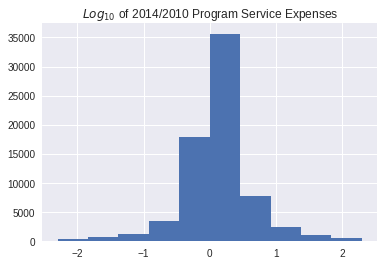

In [333]:
%matplotlib inline
c_to_plot='TOTALPROGSERVEXP_ratio_5'
c_to_const='TOTALPROGSERVEXP_ratio_5'
l_cutoff=0.1
h_cutoff=10

tmp=npda
tmp=tmp[tmp[c_to_const]!=1]
tmp=tmp[tmp[c_to_const]<h_cutoff]
tmp=tmp[tmp[c_to_const]>l_cutoff]
beg_end_exp=np.log(tmp[c_to_plot])

plt.hist(beg_end_exp.values)
plt.title(r'$Log_{10}$ of 2014/2010 Program Service Expenses')

/home/phrenk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/home/phrenk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


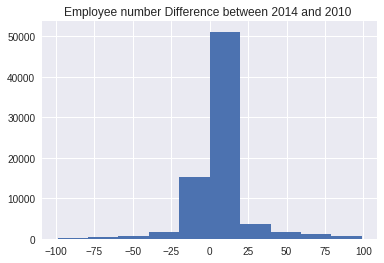

In [332]:
c_to_plot='TOTEMPLOYEE_diff_5'
c_to_const='TOTALPROGSERVEXP_ratio_5'

emp_diff_cutoff=100
tmp=npda
tmp=tmp[tmp[c_to_const]!=0]
tmp=tmp[tmp[c_to_const]<h_cutoff]
tmp=tmp[tmp[c_to_const]>l_cutoff]
tmp=tmp[npda[c_to_plot]<emp_diff_cutoff]
tmp=tmp[npda[c_to_plot]>-emp_diff_cutoff]
beg_end_empdiff=tmp[c_to_plot]
plt.hist(beg_end_empdiff.values)
plt.title(r'Employee number Difference between 2014 and 2010 ')

In [293]:
print(np.min(npda['TOTEMPLOYEE_diff_5']),np.max(npda['TOTEMPLOYEE_diff_5']))

-220855.0 787050.0


In [300]:
namecol

Index(['EIN', 'SALARIESCURRENT_ratio_1', 'SALARIESCURRENT_ratio_2',
       'TOTALPROGSERVEXP_ratio_1', 'TOTALPROGSERVEXP_ratio_2',
       'TOTALPROGSERVEXP_ratio_3', 'TOTALPROGSERVEXP_ratio_4',
       'TOTALPROGSERVEXP_ratio_5', 'SALARIESCURRENT_diff_1',
       'SALARIESCURRENT_diff_2', 'SALARIESCURRENT_diff_3',
       'SALARIESCURRENT_diff_4', 'SALARIESCURRENT_diff_5',
       'TOTEMPLOYEE_diff_1', 'TOTEMPLOYEE_diff_2', 'TOTEMPLOYEE_diff_3',
       'TOTEMPLOYEE_diff_4', 'TOTEMPLOYEE_diff_5'],
      dtype='object')

In [301]:
namecol[3]

'TOTALPROGSERVEXP_ratio_1'

In [1]:

l_cutoff=0.1
h_cutoff=1.1
fig=plt.figure(4,figsize=(18,4))
for i in range(0,4):
    c_to_plot=namecol[3+i]
    c_to_const=c_to_plot
    
    tmp=npda
    tmp=tmp[tmp[c_to_const]!=1]
    tmp=tmp[tmp[c_to_const]<h_cutoff]
    tmp=tmp[tmp[c_to_const]>l_cutoff]
    beg_end_exp=np.log(tmp[c_to_plot])
    
    a=plt.subplot('1'+str(4)+str(i+1))
    a.hist(beg_end_exp)
    a.set_xlabel('201'+str(i+1)+'/'+'201'+str(i))
plt.title(r'$Log_{10}$ of subsequent year ratios of Program Service Expenses')

NameError: name 'plt' is not defined

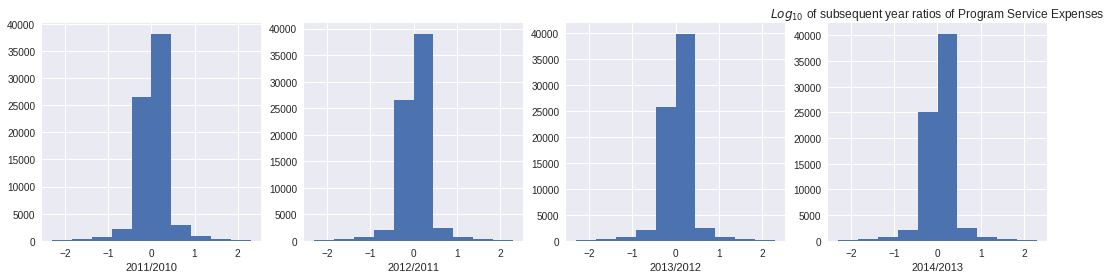

In [327]:
l_cutoff=0.1
h_cutoff=10
fig=plt.figure(4,figsize=(18,4))
for i in range(0,4):
    c_to_plot=namecol[3+i]
    c_to_const=c_to_plot
    
    tmp=npda
    tmp=tmp[tmp[c_to_const]!=1]
    tmp=tmp[tmp[c_to_const]<h_cutoff]
    tmp=tmp[tmp[c_to_const]>l_cutoff]
    beg_end_exp=np.log(tmp[c_to_plot])
    
    a=plt.subplot('1'+str(4)+str(i+1))
    a.hist(beg_end_exp)
    a.set_xlabel('201'+str(i+1)+'/'+'201'+str(i))
plt.title(r'$Log_{10}$ of subsequent year ratios of Program Service Expenses')


In [ ]:
def get_models(df):
    
